In [42]:
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.signal import savgol_filter
%matplotlib inline

In [43]:
N_PG = 4
N_nrn = 20
l_PG = 71
l_trial = 1000
PG_fr = 5 # hz
nrn_fr = 30 # hz

np.random.seed(41)


In [44]:
# for matplotlib
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
len(colors)

10

# For generating the labels and the frequency of the PG's in the generated data.

In [45]:
time = np.arange(0,l_trial,1)
pg_events = []

for k in range(N_PG):
    pg = np.array([np.random.randint(1000) for t in time])
    pg = np.where(pg <PG_fr)[0]
    pg = pg[pg < 1000-l_PG]
    pg_events.append((pg,1+k*np.ones(pg.shape)))
    

In [46]:
pg_events

[(array([ 84, 233, 860, 889, 891], dtype=int64), array([1., 1., 1., 1., 1.])),
 (array([376, 491, 628, 667, 799], dtype=int64), array([2., 2., 2., 2., 2.])),
 (array([398, 480], dtype=int64), array([3., 3.])),
 (array([  0, 690], dtype=int64), array([4., 4.]))]

In [47]:
motifs = []
'''
Parameters to the fs gaussian
f(x)=ae^{-\frac{(x-b)^{2}}{2c^{2}}}
'''


for k in range(len(pg_events)):
    motif = []
    for n in range(N_nrn):
        fr = np.random.poisson(nrn_fr)
        nrn_events = np.array([np.random.randint(0,1000) for k in range(l_PG)])
        nrn_events = np.array(np.where(nrn_events < fr)[0])
        nrn_nm = n*np.ones(len(nrn_events))
        motif.append((nrn_events,nrn_nm))
    motifs.append(motif)
print(len(motifs),len(motifs[0]),len(motifs[0][1]))
motifs[0][1] # PG_num , N_nrn

4 20 2


(array([33], dtype=int64), array([1.]))

In [48]:
motifs[0][0][0],motifs[0][0][1]

(array([44, 56, 66], dtype=int64), array([0., 0., 0.]))

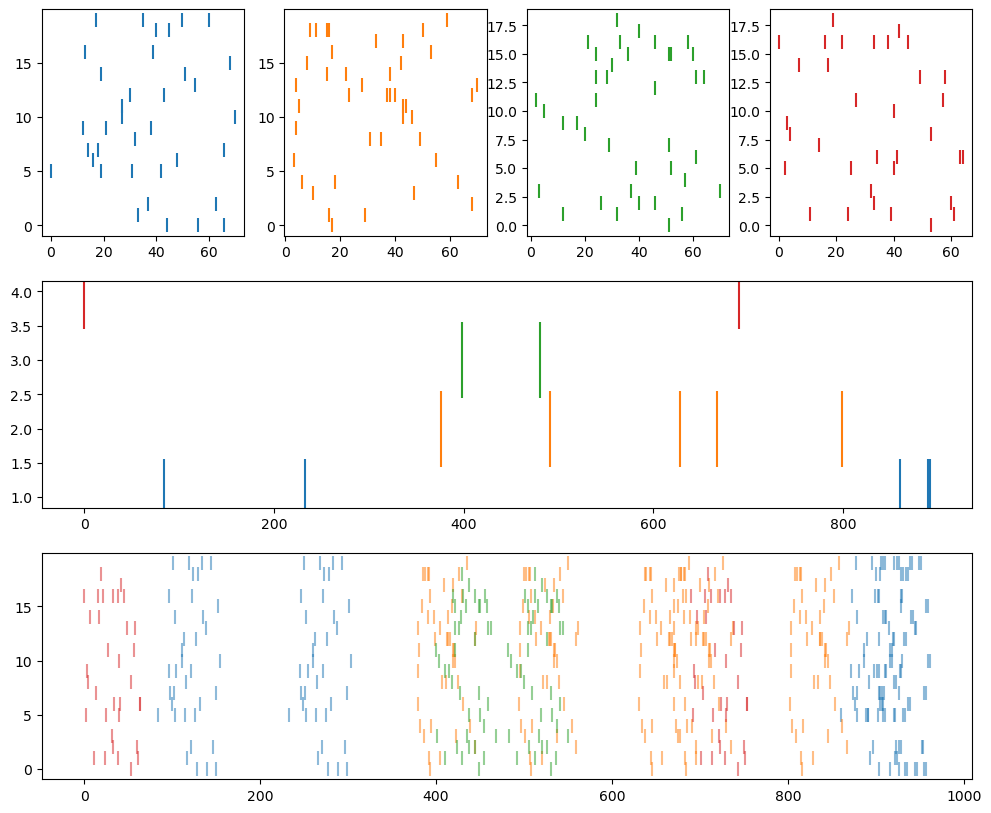

In [49]:
%matplotlib inline
fig, axes = plt.subplot_mosaic("ABCD;EEEE;FFFF", figsize=(12,10));


[axes['A'].scatter(motifs[0][n][0],motifs[0][n][1], marker = '|',s=100,color=colors[0]) for n in range(N_nrn)]
[axes['B'].scatter(motifs[1][n][0],motifs[1][n][1], marker = '|',s=100,color=colors[1]) for n in range(N_nrn)]
[axes['C'].scatter(motifs[2][n][0],motifs[2][n][1], marker = '|',s=100,color=colors[2]) for n in range(N_nrn)]
[axes['D'].scatter(motifs[3][n][0],motifs[3][n][1], marker = '|',s=100,color=colors[3]) for n in range(N_nrn)]

[axes['E'].scatter(pg[0],pg[1], marker = '|',s=3000) for pg in pg_events]

for i, pg in enumerate(pg_events):
    for pg_time in pg[0]:
        [axes['F'].scatter(pg_time+np.array(motifs[i][n][0]),motifs[i][n][1], marker = '|',s=100,color=colors[i], alpha=0.5) for n in range(N_nrn)]


Generate the dataset

In [50]:
pg = pg_events[0]
pg

(array([ 84, 233, 860, 889, 891], dtype=int64), array([1., 1., 1., 1., 1.]))

In [51]:
nrn_activity = []
for n in range(N_nrn):
        
    temp_times= np.array([])
    temp_labels = np.array([])
    
    for i, pg in enumerate(pg_events):
        for pg_time in pg[0]:
            
            temp_times = np.append(temp_times, pg_time + np.array(motifs[i][n][0]))
            temp_labels = np.append(temp_labels, np.array(motifs[i][n][1]))
    
    nrn_activity.append((temp_times, temp_labels))
    nrn_activity[-1][0].sort()
#     nrn_activity[-1][0] = np.unique(nrn_activity[-1][0])
print(len(nrn_activity),len(nrn_activity[0]))

20 2


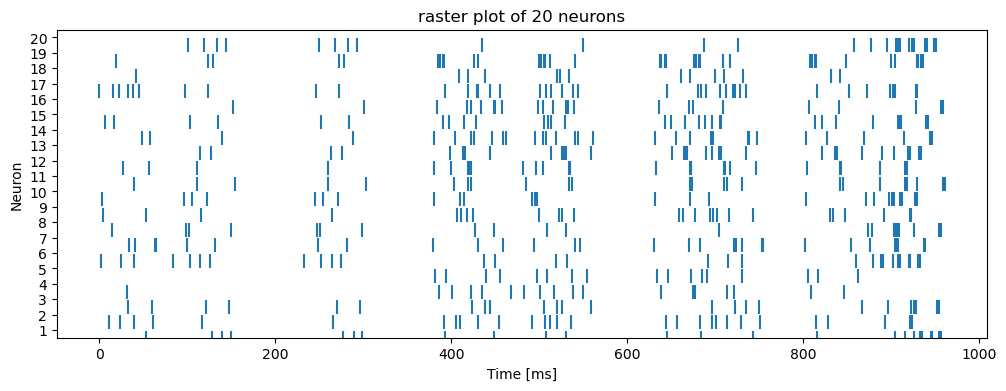

In [52]:
plt.figure(figsize=(12,4))
[plt.scatter(nrn_activity[n][0],nrn_activity[n][1], marker = '|',s=100,color=colors[0]) for n in range(N_nrn)]

plt.ylim(0, N_nrn)
plt.yticks(np.arange(0, N_nrn)+.5, labels=np.linspace(1, N_nrn, N_nrn, endpoint=True).astype(int))
plt.title('raster plot of %d neurons' % N_nrn)
plt.xlabel('Time [ms]')
plt.ylabel('Neuron')
plt.show()

In [53]:
nrn_activity[0][0].astype('int')

array([ 53, 128, 140, 150, 277, 289, 299, 393, 449, 508, 531, 645, 684,
       743, 816, 904, 916, 926, 933, 935, 945, 947, 955, 957])

I'd like to convert this to a binary matrix as well...

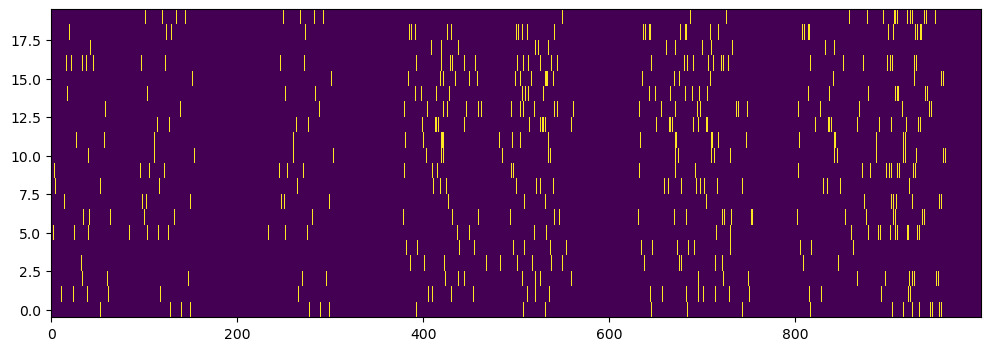

In [54]:
nrn_activity_binary = np.zeros((l_trial,N_nrn))
for n in range(N_nrn):
    nrn_activity_binary[nrn_activity[n][0].astype('int'),n] = 1

plt.figure(figsize=(12,4))
plt.imshow(nrn_activity_binary.T, interpolation='nearest', aspect='auto', origin='lower')

# What can we do with Unsupervised learning?

In [61]:
len(nrn_activity),len(nrn_activity[0][0])

(20, 24)

In [65]:
firing_rates = np.array([len(k[0]) for k in nrn_activity])
isis = []
for i in range(len(nrn_activity)):
    isis.append(np.diff(nrn_activity[i][0]))

firing_rates
isis[0]

array([ 75.,  12.,  10., 127.,  12.,  10.,  94.,  56.,  59.,  23., 114.,
        39.,  59.,  73.,  88.,  12.,  10.,   7.,   2.,  10.,   2.,   8.,
         2.])

Let's look at the first neuron, and see if we can try and classify it's spikes

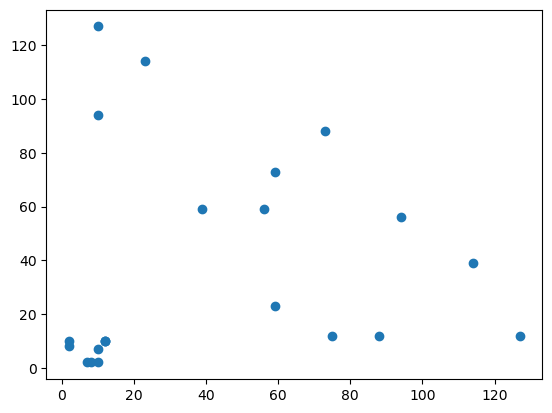

In [88]:
n = 0
feature1 = np.concatenate(([np.nan], isis[n])) # each element corresponds to the isi between that neuron and the one before it
feature2 = np.concatenate((isis[n], [np.nan])) # between that neuron an the one after it

plt.figure()
plt.scatter(feature1,feature2)
plt.show()